In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
from time import time
import pickle

import sklearn.gaussian_process as gp
import sklearn.gaussian_process.kernels as ker

from sklearn import pipeline
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.kernel_approximation import (RBFSampler, Nystroem)
from sklearn.preprocessing import StandardScaler

### Data import and visualization  

In [3]:
# load data
train_x = np.loadtxt('train_x.csv', delimiter=',', skiprows=1)
train_y = np.loadtxt('train_y.csv', delimiter=',', skiprows=1)
test_x = np.loadtxt('test_x.csv', delimiter=',', skiprows=1)

print("Loaded {} training data points".format(train_x.shape[0]))


Loaded 15189 training data points


In [15]:
print(train_x.shape)

(15189, 3)


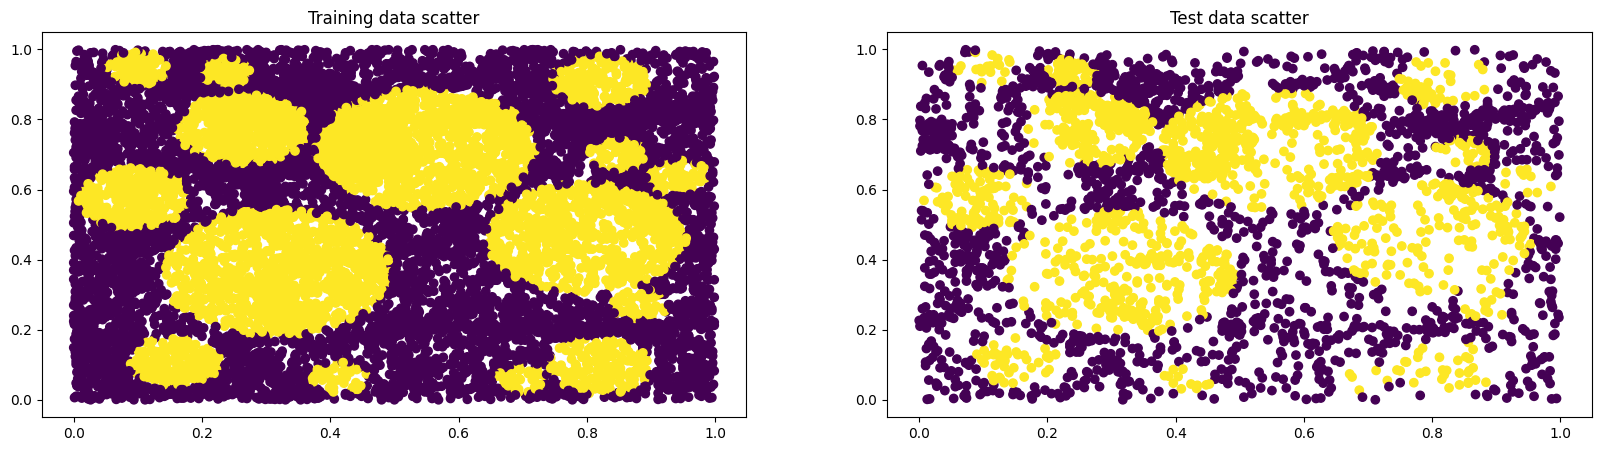

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
ax1.scatter(train_x[:,0], train_x[:,1], c=train_x[:,2])
ax1.set_title("Training data scatter")

ax2.scatter(test_x[:,0], test_x[:,1], c=test_x[:,2])
ax2.set_title("Test data scatter")
plt.show()

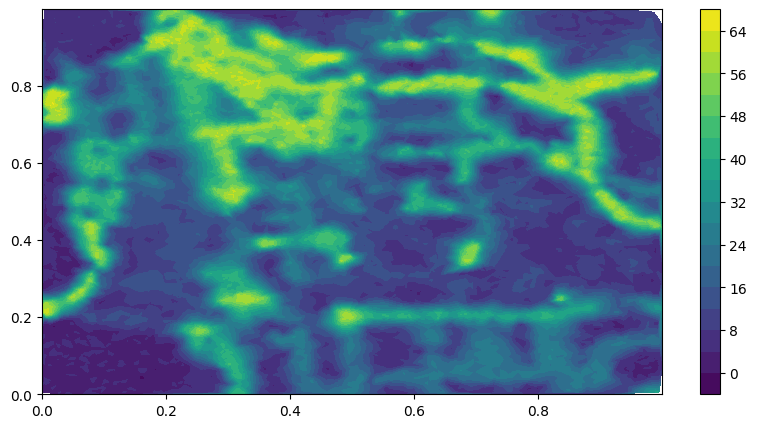

In [5]:
fig, ax = plt.subplots(figsize=(10,5))
tcf = ax.tricontourf(train_x[:,0], train_x[:,1], train_y, 20)
fig.colorbar(tcf)
plt.show()

Striking resemblance of test data scatter and the heat map.

In [13]:
from matplotlib.patches import Circle
def plot_circles(circle_data):
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Iterate through the circle data and plot each circle
    for circle_info in circle_data:
        x, y, radius = circle_info
        circle = Circle((x, y), radius, fill=False, color='blue')
        ax.add_patch(circle)

    # Set the aspect ratio to be equal
    ax.set_aspect('equal', adjustable='box')

    # Calculate axis limits based on circle data
    x_min = np.min(circle_data[:, 0] - circle_data[:, 2])
    x_max = np.max(circle_data[:, 0] + circle_data[:, 2])
    y_min = np.min(circle_data[:, 1] - circle_data[:, 2])
    y_max = np.max(circle_data[:, 1] + circle_data[:, 2])
    
    # Adjust the axis limits to fit all circles
    ax.set_xlim(x_min - 1, x_max + 1)
    ax.set_ylim(y_min - 1, y_max + 1)

    # Display the plot
    plt.show()

In [11]:
circles = np.array([[0.5488135, 0.71518937, 0.17167342],
                    [0.79915856, 0.46147936, 0.1567626 ],
                    [0.26455561, 0.77423369, 0.10298338],
                    [0.6976312,  0.06022547, 0.04015634],
                    [0.31542835, 0.36371077, 0.17985623],
                    [0.15896958, 0.11037514, 0.07244247],
                    [0.82099323, 0.09710128, 0.08136552],
                    [0.41426299, 0.0641475,  0.04442035],
                    [0.09394051, 0.5759465,  0.08729856],
                    [0.84640867, 0.69947928, 0.04568374],
                    [0.23789282, 0.934214,   0.04039037],
                    [0.82076712, 0.90884372, 0.07434012],
                    [0.09961493, 0.94530153, 0.04755969],
                    [0.88172021, 0.2724369,  0.04483477],
                    [0.9425836,  0.6339977,  0.04979664]])

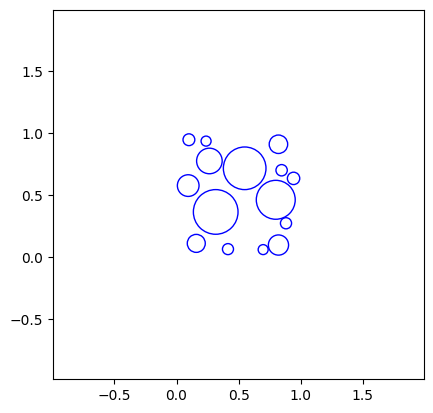

In [14]:
plot_circles(circles)